<a href="https://colab.research.google.com/github/so-yeon-hwang/DataSciencePractice/blob/main/PCA_pr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris # 중괄호로 시작 > dictionary

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
iris['data'] # numpy array  iris.data도 가능
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

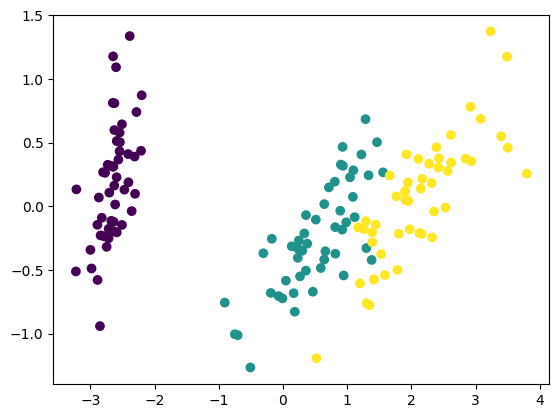

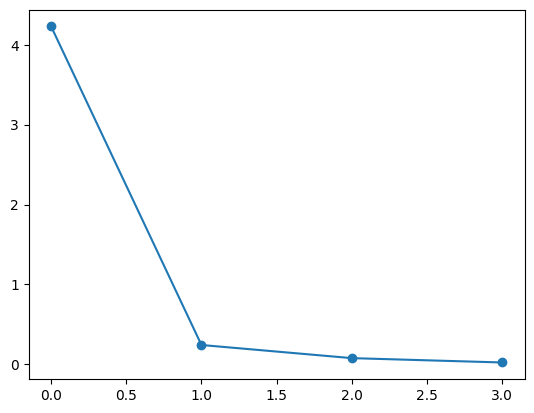

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=4) # 모델생성 n_components = 4 - 차원축소
Y = pca.fit_transform(iris['data']) # 입력 데이터가 변환된 축을 Y로 저장

plt.scatter(Y[:,0],Y[:,1], c = iris['target']) # 0번째, 1번째 피쳐로 scatter plot
plt.show()

plt.plot(pca.explained_variance_, '-o')
plt.show()

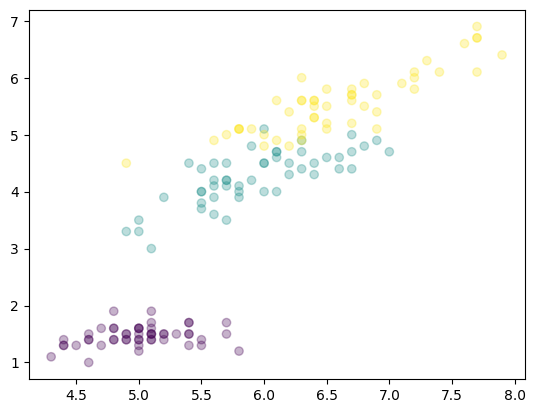

In [12]:
X = iris.data
Y = pca.fit_transform(X)

plt.scatter(X[:,0],X[:,2], c = iris.target, alpha = 0.3) # 0번째, 1번째 차원

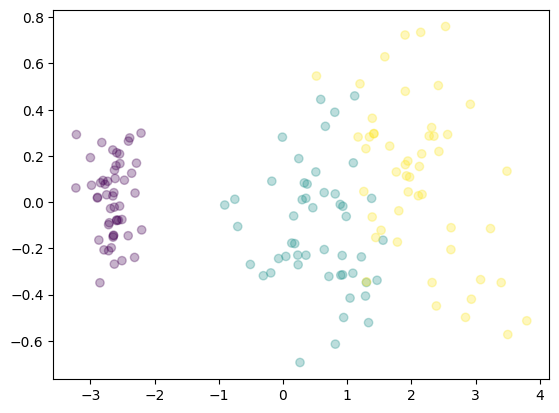

In [13]:
plt.scatter(Y[:,0],Y[:,2], c = iris.target, alpha = 0.3)

L :  [0.02367619 0.0776881  0.24105294 4.20005343]
Q :  [[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


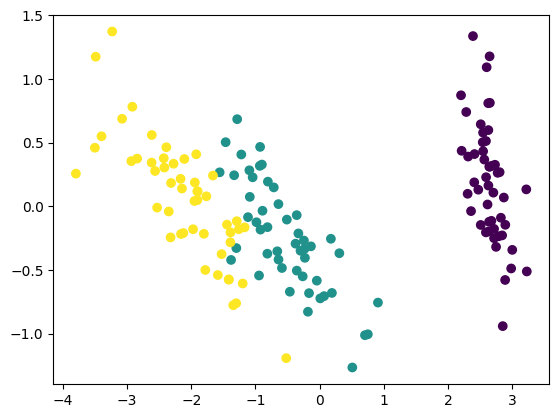

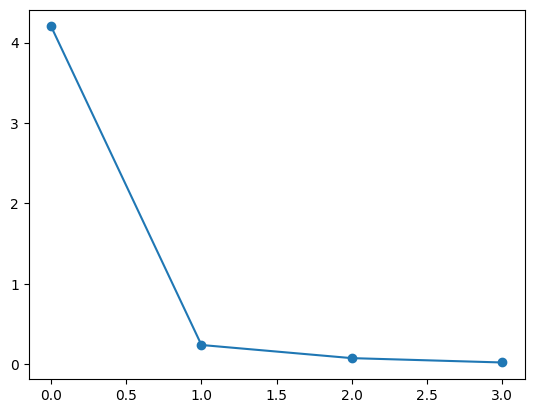

In [14]:
from numpy import linalg

X = iris.data
X = X - X.mean(axis=0) # 각 축의 평균이 0이 되게 만들어야 한다

C = (X.T @ X) / X.shape[0] # covariance matrix
L, Q = linalg.eigh(C) # eigen decomposition

print('L : ', L)
print('Q : ', Q)

plt.scatter(X @ Q[:,3], X @ Q[:,2], c = iris.target)
plt.show()

plt.plot(sorted(L,reverse = True), '-o')
plt.show()

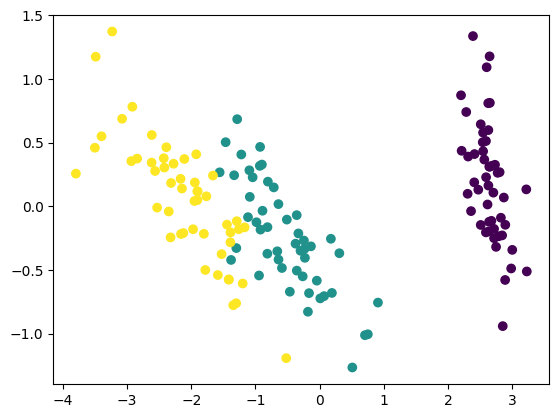

In [15]:
Y = X @ Q # 내적곱
plt.scatter(Y[:,3], Y[:,2], c = iris.target)

# PCA via SVD

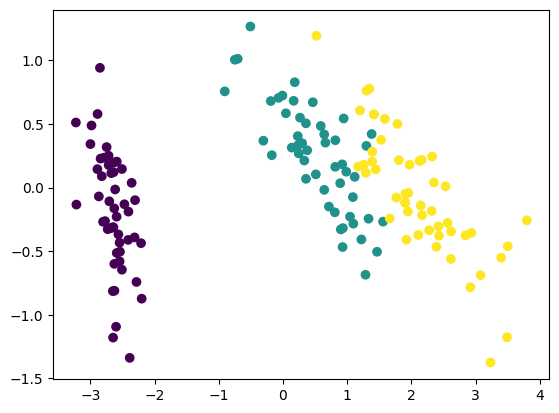

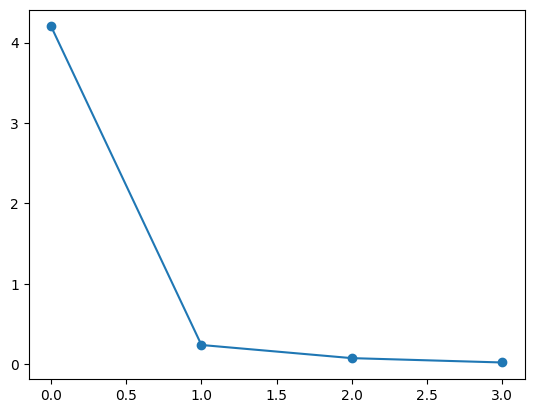

In [16]:
X = iris.data
X = X - X.mean(axis=0)

U, S, VT = linalg.svd(X)

plt.scatter(X @ VT[0], X @ VT[1], c = iris.target)
plt.show()

variances = (S ** 2) / X.shape[0]
plt.plot(variances, '-o')
plt.show()